In [ ]:
from Constants import *
from DataSetLoader import *
from CodebookApproach import *
from Classifier import *

#1
X_train, y_train, X_test, y_test = load_dataset(c_activity_category, c_sensors)

#2
X_train_trd = transpose_dataset(X_train)
X_test_trd = transpose_dataset(X_test)


ca = CodebookApproach(c_window_length, c_overlap_length, c_cluster_number)

#3
X_train_ws, X_train_wc = ca.extract_subsequences(X_train_trd)
X_test_ws, X_test_wc = ca.extract_subsequences(X_test_trd)

#4
codebooks = ca.get_codebooks(X_train_wc)

#5
X_train_histograms = ca.assign_codewords(codebooks, X_train_ws)
X_test_histograms = ca.assign_codewords(codebooks, X_test_ws)

#6
X_train = ca.concatenate_histograms(X_train_histograms)
X_test = ca.concatenate_histograms(X_test_histograms)

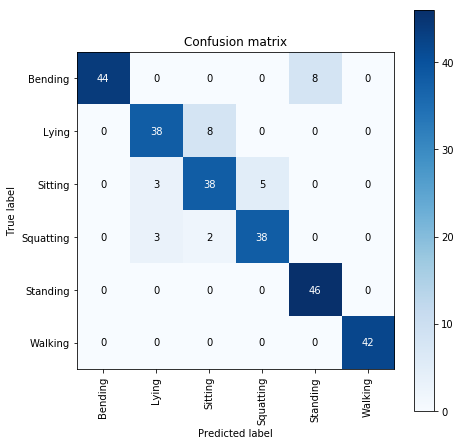

             precision    recall  f1-score   support

    Bending       1.00      0.85      0.92        52
      Lying       0.86      0.83      0.84        46
    Sitting       0.79      0.83      0.81        46
  Squatting       0.88      0.88      0.88        43
   Standing       0.85      1.00      0.92        46
    Walking       1.00      1.00      1.00        42

avg / total       0.90      0.89      0.89       275



In [3]:
#7
cl = Classifier(X_train, y_train, X_test, y_test)
y_pred = cl.svc()
cl.plot_confusion_matrix(y_pred)

In [4]:
#8
y_pred = cl.rfc()
cl.plot_confusion_matrix(y_pred)

KeyboardInterrupt: 